In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
cabbage_df = pd.read_excel("data-files/양배추_가격_2.xlsx", engine='openpyxl')

In [53]:
cabbage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21414 entries, 0 to 21413
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       21414 non-null  object 
 1   거래단위       21414 non-null  object 
 2   총거래금액      21414 non-null  int64  
 3   도매시장       21414 non-null  object 
 4   도매법인       21414 non-null  object 
 5   품목         21414 non-null  object 
 6   품종         21414 non-null  object 
 7   산지-광역시도    21414 non-null  object 
 8   산지-시군구     21414 non-null  object 
 9   등급         21414 non-null  object 
 10  단위_무게(kg)  21414 non-null  int64  
 11  1kg_물량     21414 non-null  int64  
 12  1kg_평균가격   21414 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.1+ MB


# DATE 피처 타입 변경

In [54]:
cabbage_df['DATE'] = pd.to_datetime(cabbage_df['DATE'], format='%Y-%m')

# 도매시장 피처 확인

In [80]:
cabbage_df['도매시장'].unique()

array(['서울가락도매', '인천삼산도매', '안산도매시장', '춘천도매시장', '대구북부도매', '부산반여도매',
       '강릉도매시장', '충주도매시장', '광주서부도매', '안양도매시장', '순천도매시장', '청주도매시장',
       '창원내서도매시장', '인천구월도매', '울산도매시장', '원주도매시장', '포항도매시장', '광주각화도매',
       '창원팔용도매시장', '전주도매시장', '구리도매시장', '수원도매시장', '부산엄궁도매', '구미도매시장',
       '서울강서도매', '진주도매시장', '천안도매시장', '대전오정도매', '정읍도매시장', '대전노은도매',
       '익산도매시장', '안동도매시장'], dtype=object)

# 산지-광역시도 피처 확인

In [ ]:
cabbage_df['산지-광역시도'].unique()

array(['충청남도', '전라남도', '강원도', '경상북도', '충남', '전남', '서울', '전라북도', '중국',
       '경기도', '대구광역시', '제주도', '부산', '강원', '부산광역시', '-', '서울특별시', '충청북도',
       '경상남도', '인천', '충북', '경북', '전북', '경남', '제주', '경기', '인천광역시', '울산광역시',
       '대구', '광주광역시', '광주', '울산', '대전광역시', '대전', '뉴질랜드', '수입산'],
      dtype=object)

# 산지-광역시도 전처리 (충남 = 충청남도와 같이)

In [57]:
# 산지-광역시도 기준 디렉토리

region_sum = {
    '충남': '충청남도', 
    '강원': '강원도', 
    '제주':'제주도', 
    '전남' : '전라남도',
    '전북' : '전라북도', 
    '강원' : '강원도',
    '충북' : '충청북도',
    '부산' : '부산광역시',
    '경남' : '경상남도',
    '서울' : '서울특별시',
    '광주' : '광주광역시', 
    '경북' : '경상북도',
    '경기' : '경기도',
    '인천' : '인천광역시',
    '대구' : '대구광역시',
    '울산' : '울산광역시',
    '대전' : '대전광역시'
}

In [58]:
# 산지-광역시도 데이터를 위에서 만든 기준 디렉토리를 이용하여 변경
# 충북 = 충청북도, 충남 = 충청남도 등

cabbage_df['산지-광역시도'] = cabbage_df['산지-광역시도'].replace(region_sum)

In [59]:
# 우리나라 지역이 아닌 곳들 제거
cabbage_df = cabbage_df[~cabbage_df['산지-광역시도'].isin(['뉴질랜드', '수입산', '중국','-'])]


# 도매시장 데이터 전처리 ( 데이터 부족한 도매시장제거 )

In [ ]:
# DATE를 datetime 형식으로 변환
cabbage_df['DATE'] = pd.to_datetime(cabbage_df['DATE'])

# Month 추가: 날짜 열에서 월 정보 추출
cabbage_df['Month'] = cabbage_df['DATE'].dt.month

# 각 도매시장의 월별 데이터 개수 확인
monthly_data_availability = cabbage_df.groupby(['도매시장', 'Month']).size().unstack(fill_value=0)

# 모든 월(1월~12월)에 데이터가 있는 도매시장만 필터링
sufficient_data_markets = monthly_data_availability[monthly_data_availability.min(axis=1) > 0].index

# 충분한 월별 데이터를 가진 도매시장만 포함한 데이터셋 생성
filtered_df = cabbage_df[cabbage_df['도매시장'].isin(sufficient_data_markets)]

# 충분한 데이터를 가진 도매시장 수와 총 데이터 개수 확인
market_counts = filtered_df['도매시장'].value_counts()
total_data_count = len(filtered_df)

# 결과 출력
{
    "Total Markets After Filtering": len(sufficient_data_markets),  # 제거 후 남은 도매시장 수
    "Total Data Count After Filtering": total_data_count            # 필터링 후 총 데이터 개수
}



C:\Users\human\AppData\Local\Temp\ipykernel_3188\691510534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_80['DATE'] = pd.to_datetime(filtered_data_80['DATE'])
C:\Users\human\AppData\Local\Temp\ipykernel_3188\691510534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_80['Month'] = filtered_data_80['DATE'].dt.month


{'Total Markets After Filtering': 30,
 'Total Data Count After Filtering': 16850}

# 시각화를 위해 도매시장별, 광역시도별로 그룹화

In [94]:
# 시각화 하기 위해서 1kg_평균가격, 1kg_물량, 도매시장, 산지-광역시도 컬럼만 가져오기

filtered_df['1kg_평균가격'] = pd.to_numeric(filtered_df['1kg_평균가격'], errors='coerce')
filtered_df['1kg_물량'] = pd.to_numeric(filtered_df['1kg_물량'], errors='coerce')


filtered_df_cleaned = filtered_df.dropna(subset=['1kg_평균가격', '1kg_물량', '도매시장', '산지-광역시도'])

# 가중치
filtered_df_cleaned['weighted_price'] = (
    filtered_df_cleaned['1kg_평균가격'] * filtered_df_cleaned['1kg_물량']
)


# 도매시장별로 그룹화
weighted_avg_market = (
    filtered_df_cleaned.groupby(['DATE', '도매시장']).apply(
        lambda g: g['weighted_price'].sum() / g['1kg_물량'].sum()
    ).reset_index(name='가중_평균가격')
)

# 광역시도별로 그룹화
weighted_avg_ragion = (
    filtered_df_cleaned.groupby(['DATE', '산지-광역시도'])
    .apply(lambda g: g['weighted_price'].sum() / g['1kg_물량'].sum())
    .reset_index(name='가중_평균가격')
)

C:\Users\human\AppData\Local\Temp\ipykernel_3188\2789896412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['1kg_평균가격'] = pd.to_numeric(filtered_df['1kg_평균가격'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_3188\2789896412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['1kg_물량'] = pd.to_numeric(filtered_df['1kg_물량'], errors='coerce')
C:\Users\human\AppData\Local\Temp\ipykernel_3188\2789896412.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the gr

# 도매시장별 월별 시각화

<Figure size 1400x800 with 0 Axes>

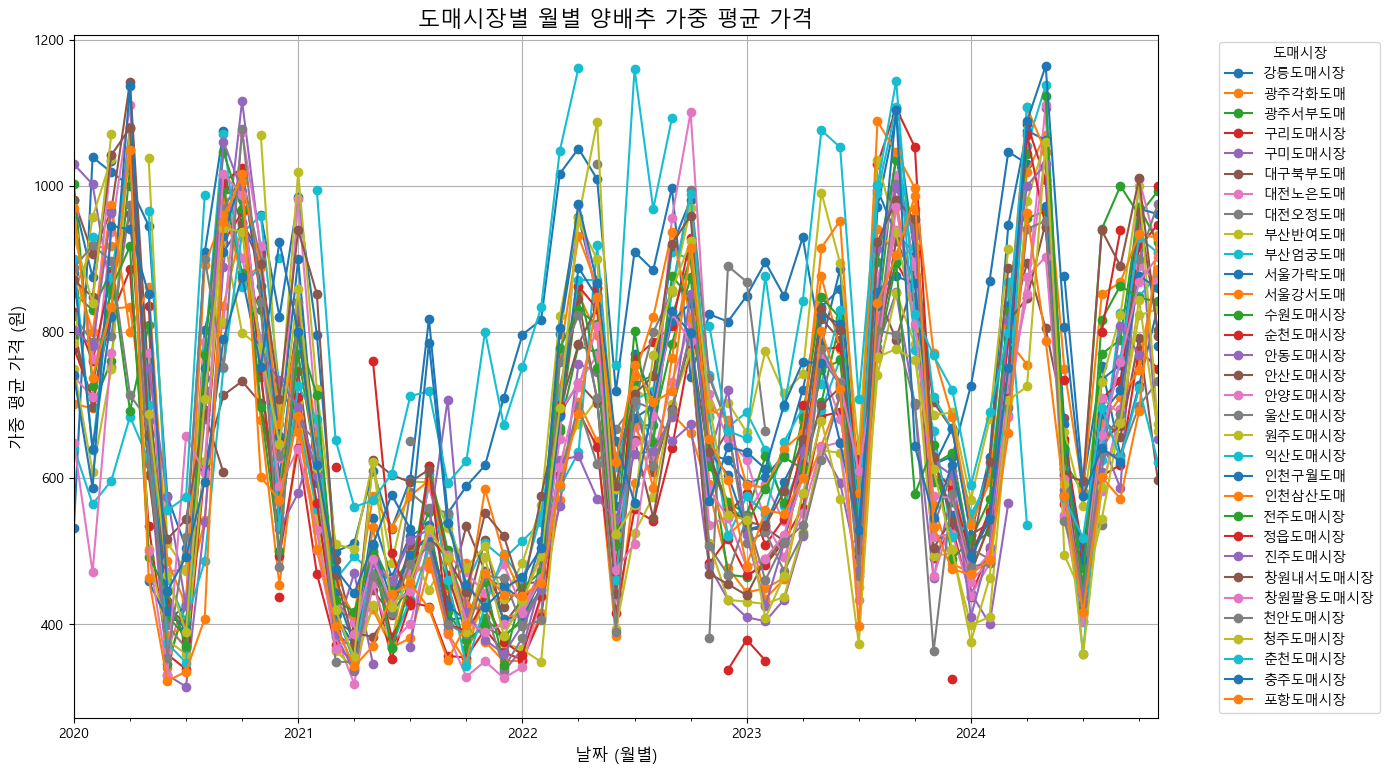

In [90]:
#도매시장별 월별 가격 시각화

import matplotlib.pyplot as plt

#한글
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


cabbage_market_pivot = weighted_avg_market.pivot(index='DATE', columns='도매시장', values='가중_평균가격')

plt.figure(figsize=(14, 8))
cabbage_market_pivot.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('도매시장별 월별 양배추 가중 평균 가격', fontsize=16)
plt.xlabel('날짜 (월별)', fontsize=12)
plt.ylabel('가중 평균 가격 (원)', fontsize=12)
plt.grid(True)
plt.legend(title='도매시장', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [86]:
filtered_df_cleaned[filtered_df_cleaned['도매시장'] == '정읍도매시장']

,DATE,거래단위,총거래금액,도매시장,도매법인,품목,품종,산지-광역시도,산지-시군구,등급,단위_무게(kg),1kg_물량,1kg_평균가격,Month,weighted_price
3572,2021-07-01,8kg그물망,57500,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,정읍시,특,8,2944,156.250000,7,460000.0
3579,2021-07-01,8kg그물망,59000,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,고창군,특,8,2048,230.468750,7,472000.0
3671,2021-06-01,8kg그물망,386300,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,고창군,특,8,9984,309.535256,6,3090400.0
3687,2021-06-01,8kg그물망,128000,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,정읍시,특,8,2176,470.588235,6,1024000.0
3925,2021-03-01,8kg그물망,67900,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,고창군,특,8,5376,101.041667,3,543200.0
3927,2021-03-01,8kg그물망,320050,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,정읍시,특,8,4160,615.480769,3,2560400.0
3996,2021-02-01,8kg그물망,42000,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,고창군,특,8,3200,105.000000,2,336000.0
4161,2020-12-01,8kg그물망,494900,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,고창군,특,8,15744,251.473577,12,3959200.0
4190,2020-12-01,8kg그물망,35000,정읍도매시장,정읍원협(공),양배추,양배추(일반),전라북도,정읍시,특,8,640,437.500000,12,280000.0
4516,2020-09-01,8kg그물망,263260,정읍도매시장,정읍원협(공),양배추,양배추(일반),광주광역시,광주광역시,특,8,1408,1495.795455,9,2106080.0


# 광역시도별 월별 가격시각화

<Figure size 1400x800 with 0 Axes>

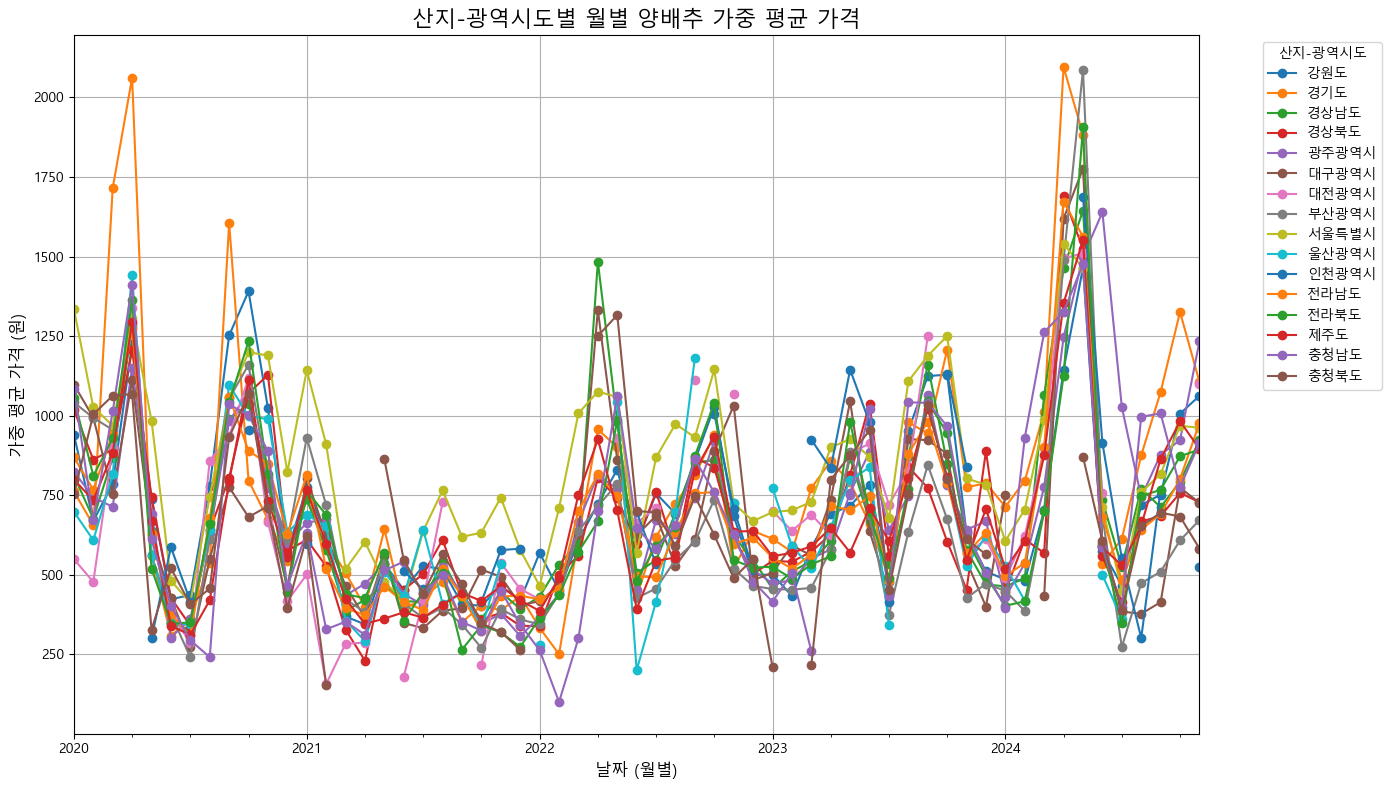

In [63]:
#광역시도별 월별 가격시각화

import matplotlib.pyplot as plt

#한글
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

weighted_avg_ragion = weighted_avg_ragion[weighted_avg_ragion['산지-광역시도'] != '-']

cabbage_ragion_pivot = weighted_avg_ragion.pivot(index='DATE', columns='산지-광역시도', values='가중_평균가격')

plt.figure(figsize=(14, 8))
cabbage_ragion_pivot.plot(kind='line', figsize=(14, 8), marker='o')

plt.title('산지-광역시도별 월별 양배추 가중 평균 가격', fontsize=16)
plt.xlabel('날짜 (월별)', fontsize=12)
plt.ylabel('가중 평균 가격 (원)', fontsize=12)
plt.grid(True)
plt.legend(title='산지-광역시도', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [64]:
# cabbage_df_cleaned.to_csv("data-files/cabbage_df_cleaned.csv", index=False)

# 기후데이터

In [65]:
# 기후 데이터 가져오기

weather_final = pd.read_csv("data-files/weather_final.csv")

In [66]:
weather_final

,광역시도,평균기온,평균풍속,평균강수량,DATE
0,강원도,-3.48,2.06,2.07,2019-01
1,강원도,-1.12,1.82,22.44,2019-02
2,강원도,4.30,2.18,41.57,2019-03
3,강원도,9.15,2.13,55.95,2019-04
4,강원도,16.84,2.24,18.88,2019-05
...,...,...,...,...,...
1193,충청북도,22.34,1.27,118.63,2024-06
1194,충청북도,25.83,1.41,449.82,2024-07
1195,충청북도,27.35,1.10,67.85,2024-08
1196,충청북도,23.90,1.08,233.70,2024-09


In [67]:
weather_final['DATE'] = pd.to_datetime(weather_final['DATE'], format='%Y-%m')

# 기후데이터와 양배추데이터 병합

In [68]:
merged_df = cabbage_df_cleaned.merge(
    weather_final,
    left_on=['DATE', '산지-광역시도'],
    right_on=['DATE', '광역시도'],
    how='left'
)

In [69]:
# merged_df.to_csv("data-files/merged_df_1.csv", index = False)

In [70]:
merged_df['DATE'] = merged_df['DATE'].dt.to_period('M').dt.to_timestamp()

# 필요없는 피처 제거( 사용하지 않는 피처 )

In [71]:
merged_df = merged_df.drop(columns=['총거래금액', '산지-시군구', '품목', '품종', '도매법인'])


In [72]:
merged_df = merged_df[~merged_df['DATE'].isin(['2024-11-01'])]

C:\Users\human\AppData\Local\Temp\ipykernel_3188\1813582411.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  merged_df = merged_df[~merged_df['DATE'].isin(['2024-11-01'])]


In [73]:
merged_df

,DATE,거래단위,도매시장,산지-광역시도,등급,단위_무게(kg),1kg_물량,1kg_평균가격,weighted_price,광역시도,평균기온,평균풍속,평균강수량
87,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,22824192,1132.094998,2.583915e+10,강원도,12.93,1.56,130.36
88,2024-10-01,8kg그물망,서울가락도매,충청남도,특,8,10377536,743.505125,7.715751e+09,충청남도,16.32,2.29,92.38
89,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,10340416,1248.230942,1.290723e+10,강원도,12.93,1.56,130.36
90,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,6676480,828.431629,5.531007e+09,강원도,12.93,1.56,130.36
91,2024-10-01,8kg그물망,서울가락도매,강원도,특,8,6619776,990.455145,6.556591e+09,강원도,12.93,1.56,130.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,2020-02-01,15kg상자,전주도매시장,전라북도,특,15,105750,393.333333,4.159500e+07,전라북도,2.62,2.15,61.02
21032,2020-02-01,15kg상자,전주도매시장,전라북도,특,15,18000,920.000000,1.656000e+07,전라북도,2.62,2.15,61.02
21033,2020-01-01,15kg상자,강릉도매시장,강원도,특,15,12150,325.308642,3.952500e+06,강원도,-0.79,1.84,89.76
21034,2020-01-01,15kg상자,익산도매시장,전라북도,특,15,9000,640.000000,5.760000e+06,전라북도,2.04,1.94,83.95


# 상관관계 확인 (물량 - 기후)

In [74]:
# 각 재배 방식에 대한 파종 시기와 수확 시기 정의
cultivation_periods = {
    "봄재배": {"planting": [3, 4, 5, 6], "harvesting": [6, 7]},
    "가을재배": {"planting": [9, 10], "harvesting": [10, 11]},
    "월동재배": {"planting": [9, 10, 11], "harvesting": [3, 4, 5]},
    "여름재배": {"planting": [6, 7, 8], "harvesting": [9, 10]}
}

# 각 재배 방식에 대한 상관관계 결과를 저장할 딕셔너리
results = {}

for crop, periods in cultivation_periods.items():
    planting_months = periods['planting']  # 파종 시기 월 정의
    harvesting_months = periods['harvesting']  # 수확 시기 월 정의
    
    # 파종 시기 기후 데이터를 연도별로 집계
    planting_climate_data = (
        merged_df[merged_df['DATE'].dt.month.isin(planting_months)]
        .groupby(merged_df['DATE'].dt.year)
        .mean(numeric_only=True)[['평균기온', '평균풍속', '평균강수량']]
        .rename_axis('YEAR')  # 연도를 인덱스로 사용
    )
    
    # 수확 시기 총 거래물량을 연도별로 집계
    harvesting_transaction_data = (
        merged_df[merged_df['DATE'].dt.month.isin(harvesting_months)]
        .groupby(merged_df['DATE'].dt.year)['1kg_물량']
        .sum()
        .rename_axis('YEAR')  # 연도를 인덱스로 사용
    )
    
    # 상관관계 분석을 위해 데이터를 병합
    combined_analysis_data = planting_climate_data.merge(
        harvesting_transaction_data,
        left_index=True,
        right_index=True
    )
    
    # 상관관계 계산
    correlation_results = combined_analysis_data.corr().loc['1kg_물량'].drop('1kg_물량')
    results[crop] = correlation_results  # 결과 저장

# 결과를 하나의 데이터프레임으로 변환하여 표시
correlation_results_df = pd.DataFrame(results).transpose()

In [75]:
correlation_results_df

,평균기온,평균풍속,평균강수량
봄재배,0.953714,-0.711756,0.410946
가을재배,-0.628262,-0.124120,-0.872013
월동재배,0.264685,-0.287970,-0.010283
여름재배,0.871023,0.550578,-0.257220


# 상관관계 확인( 가격 - 물량)

In [76]:
import pandas as pd

# 각 재배 유형에 대한 상관관계 결과를 저장할 딕셔너리 생성
results = {}

# 재배 유형별로 순회하며 상관관계 계산
for crop, periods in cultivation_periods.items():
    planting_months = periods['planting']  # 파종기에 해당하는 월
    harvesting_months = periods['harvesting']  # 수확기에 해당하는 월
    
    # 파종기 데이터 집계
    planting_data = (
        merged_df[merged_df['DATE'].dt.month.isin(planting_months)]  # 파종기에 해당하는 데이터 필터링
        .groupby(merged_df['DATE'].dt.year)  # 연도별로 그룹화
        .mean(numeric_only=True)[['1kg_평균가격']]  # 1kg_ 가격 계산
        .rename_axis('YEAR')  # 인덱스를 연도로 설정
    )
    
    # 수확기 데이터 집계
    harvesting_data = (
        merged_df[merged_df['DATE'].dt.month.isin(harvesting_months)]  # 수확기에 해당하는 데이터 필터링
        .groupby(merged_df['DATE'].dt.year)['1kg_물량']  # 연도별로 그룹화 후 '1kg_물량' 합계 계산
        .sum()  # 총합 계산
        .rename_axis('YEAR')  # 인덱스를 연도로 설정
    )
    
    # 파종기 데이터와 수확기 데이터를 연도별로 병합
    combined_data = planting_data.merge(
        harvesting_data,
        left_index=True,  # 파종기 데이터의 연도를 기준으로 병합
        right_index=True  # 수확기 데이터의 연도를 기준으로 병합
    )
    
    # 상관관계 계산
    correlation_results = combined_data.corr().loc['1kg_물량'].drop('1kg_물량')  # '1kg_물량'과 다른 변수 간의 상관관계 계산
    results[crop] = correlation_results  # 결과를 해당 재배 유형에 저장

# 결과를 DataFrame으로 변환
correlation_results_df = pd.DataFrame(results).transpose()

In [77]:
correlation_results_df

,1kg_평균가격
봄재배,0.878536
가을재배,0.143999
월동재배,-0.568012
여름재배,0.395083


# 도매시장 데이터 전처리 ( 데이터 부족한 도매시장제거 )

In [81]:
# DATE를 datetime 형식으로 변환
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Month 추가: 날짜 열에서 월 정보 추출
merged_df['Month'] = merged_df['DATE'].dt.month

# 각 도매시장의 월별 데이터 개수 확인
monthly_data_availability = merged_df.groupby(['도매시장', 'Month']).size().unstack(fill_value=0)

# 모든 월(1월~12월)에 데이터가 있는 도매시장만 필터링
sufficient_data_markets = monthly_data_availability[monthly_data_availability.min(axis=1) > 0].index

# 충분한 월별 데이터를 가진 도매시장만 포함한 데이터셋 생성
filtered_df = merged_df[merged_df['도매시장'].isin(sufficient_data_markets)]

# 충분한 데이터를 가진 도매시장 수와 총 데이터 개수 확인
market_counts = filtered_df['도매시장'].value_counts()
total_data_count = len(filtered_df)

# 결과 출력
{
    "Total Markets After Filtering": len(sufficient_data_markets),  # 제거 후 남은 도매시장 수
    "Total Data Count After Filtering": total_data_count            # 필터링 후 총 데이터 개수
}



{'Total Markets After Filtering': 30,
 'Total Data Count After Filtering': 20580}